## Students t test for nose heights
* Determine if nose heights for no wind farm LLJs are statistically different than for wind farm parametrizations. Here, I combine data from vw-centroid, sw corner of vw, ne buoy, se buoy, southern la

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats

In [2]:
vwcent_nwf = pd.read_csv('../detection2/NWF_vwcent.csv')
nebuoy_nwf = pd.read_csv('../detection2/NWF_nebuoy.csv')
southcent_nwf = pd.read_csv('../detection2/NWF_southcent.csv')
swbuoy_nwf = pd.read_csv('../detection2/NWF_swbuoy.csv')
swcorner_nwf = pd.read_csv('../detection2/NWF_vwcorner.csv')

vwcent_wf = pd.read_csv('../detection2/VW100_vwcent.csv')
nebuoy_wf = pd.read_csv('../detection2/CA100_nebuoy.csv')
southcent_wf = pd.read_csv('../detection2/LA100_southcent.csv')
swbuoy_wf = pd.read_csv('../detection2/CA100_swbuoy.csv')
swcorner_wf = pd.read_csv('../detection2/VW100_vwcorner.csv')

nwf = pd.concat([vwcent_nwf, nebuoy_nwf, southcent_nwf, swbuoy_nwf, swcorner_nwf])
wf = pd.concat([vwcent_wf, nebuoy_wf, southcent_wf, swbuoy_wf, swcorner_wf])

In [3]:
nwf = nwf['Nose height (meters)'].dropna()
wf = wf['Nose height (meters)'].dropna()

In [4]:
len(nwf), len(wf)

(8273, 6378)

### data exploration

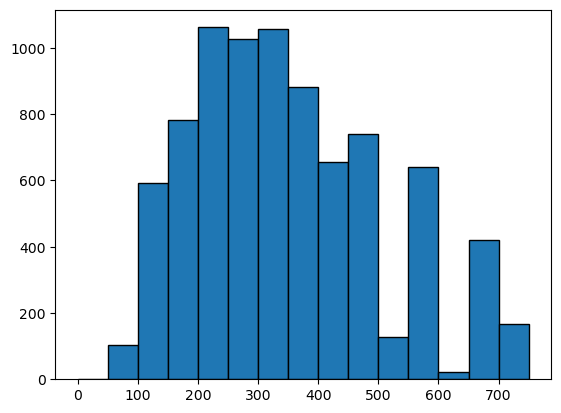

In [6]:
plt.hist(nwf, bins=np.arange(0, 800, 50), edgecolor='k');

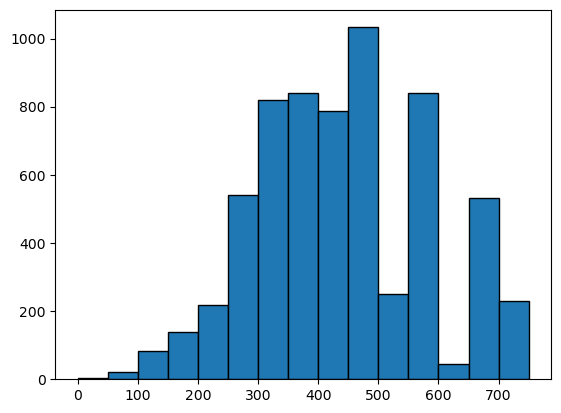

In [7]:
plt.hist(wf, bins=np.arange(0, 800, 50), edgecolor='k');

In [8]:
statistics.variance(nwf), statistics.variance(wf), statistics.variance(nwf)/statistics.variance(wf)

(24907.6858062216, 20216.1409596679, 1.2320692587132995)

In [9]:
nwf.mean(), wf.mean()

(348.8777053922462, 439.77778387024847)

In [10]:
nwf.min(), wf.min(), nwf.max(), wf.max()

(47.26945114135742, 45.110496520996094, 735.7821655273438, 735.8635864257812)

### t-test
* We will use a two-sample t-test because there are two groups of samples and we want to compare them to find whether they belong to the same population
* null hypothesis: the means of nwf and wf are equal
* alternative hypothesis: the mean of the nwf sample is less than the mean of the wf sample
* use alpha=0.05

In [17]:
stats.ttest_ind(a=nwf, b=wf, equal_var=False, alternative='less')

Ttest_indResult(statistic=-36.56422725915639, pvalue=3.346024166088051e-280)

#### analysis of results
* the p-value is much smaller than alpha=0.05, so we can reject the null hypothesis that the mean of the nwf nose heights is equal to the mean nose height for the wf nose heights

## Summary

* In this analysis I compared the nose heights for both nwf and wf simulations to determine if their means are different using a two-sample t-test. There were 3209 values in the nwf sample and 1864 values in the wf sample. The mean of the nwf sample was 294, and the mean of the wf sample was 382. Both samples had similar variances, and approximately normal distributions, so the t-test was appropriate. For a t-test with a null hypothesis that the two means are equal, I found a p-value of 2.7e-140, which is much lower than the threshold value of 0.05, so I can confidently reject the null hypothesis. When analyzing each location independently, the null hypothesis can be rejected for each location. 

### Further analysis for each location:

In [22]:
nwf_list = [vwcent_nwf, nebuoy_nwf, southcent_nwf, swbuoy_nwf, swcorner_nwf]
wf_list = [vwcent_wf, nebuoy_wf, southcent_wf, swbuoy_wf, swcorner_wf]

In [23]:
loc_names = ['vw-cent', 'nebuoy', 'southern_la_centroid', 'swbuoy', 'swcorner_vwinds']
for i in range(len(nwf_list)):
    nwf_i = nwf_list[i]['Nose height (meters)'].dropna()
    wf_i = wf_list[i]['Nose height (meters)'].dropna()
    
    print(loc_names[i])
    print('sample sizes: ', len(nwf_i), len(wf_i))
    print('Means: ', nwf_i.mean(), wf_i.mean())
    print('Variance: ', statistics.variance(nwf_i), statistics.variance(wf_i), statistics.variance(nwf_i)/statistics.variance(wf_i))
    print("t-test:")
    print(stats.ttest_ind(a=nwf_i, b=wf_i, equal_var=False, alternative='less'))
    print('-----------------------')

vw-cent
sample sizes:  2287 1787
Means:  354.2179383368382 461.0567836515985
Variance:  23769.36594289846 14528.675077967673 1.6360312151893353
t-test:
Ttest_indResult(statistic=-24.823795234645505, pvalue=4.286755916100405e-127)
-----------------------
nebuoy
sample sizes:  781 494
Means:  352.07263272000944 515.8969374436599
Variance:  21146.216263176393 11936.39606404903 1.7715746151274436
t-test:
Ttest_indResult(statistic=-22.88652464945472, pvalue=3.0865516420227755e-97)
-----------------------
southern_la_centroid
sample sizes:  2241 1726
Means:  337.66476160242644 429.9705455841913
Variance:  28784.50965138322 20078.20320118732 1.4336197996881044
t-test:
Ttest_indResult(statistic=-18.657234408155983, pvalue=8.223752697130543e-75)
-----------------------
swbuoy
sample sizes:  723 370
Means:  338.2753019108647 520.6083325669572
Variance:  21690.964624331176 13855.676392413452 1.5654930160037415
t-test:
Ttest_indResult(statistic=-22.20124066317467, pvalue=9.309564891996857e-88)
---